STA_141C_final_project

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

Dataset Preprocessing

In [35]:
df = pd.read_csv("./pppub23.csv")

df= df[['WEIND', 'PRDTRACE', 'PEHRUSLT', 'HEA', 'EIT_CRED', 'OI_OFF', 'A_WKSTAT', 'NOEMP', 'PTOT_R', 'AGE1', 'A_HGA', 'A_MARITL', 'A_SEX', 'MIG_ST', 'CLWK']]
df= df.rename(columns={
    'WEIND': 'Industry',
    'PRDTRACE': 'Race',
    'PEHRUSLT': 'Hours Worked',
    'HEA': 'Health Status',
    'EIT_CRED': 'Income Tax',
    'OI_OFF': 'Income Sources',
    'A_WKSTAT': 'Full/Part Status',
    'NOEMP': 'Company Size',
    'PTOT_R': 'Income',
    'AGE1': 'Age',
    'A_HGA': 'Education',
    'A_MARITL': 'Marital Status',
    'A_SEX': 'Gender',
    'MIG_ST': 'Residence',
    'CLWK': 'Job Class'
})

df.head()


,Industry,Race,Hours Worked,Health Status,Income Tax,Income Sources,Full/Part Status,Company Size,Income,Age,Education,Marital Status,Gender,Residence,Job Class
0,23,1,-1,4,0,0,1,0,5,15,39,4,2,0,5
1,23,1,-1,4,0,0,1,0,7,15,39,4,2,0,5
2,23,1,-1,3,0,0,1,0,4,11,39,1,2,0,5
3,7,1,40,3,0,0,2,6,17,11,40,1,1,0,1
4,23,1,-1,4,0,0,1,0,6,17,39,4,2,0,5


In [36]:
df = pd.read_csv("./dataset.csv")

Logistic Regression

In [37]:
#logistic 4 classes
def income_class(income):
    if income in range(0, 10): 
        return 0
    elif income in range(11, 20):  
        return 1
    elif income in range(21, 39): 
        return 2
    else:  
        return 3

df['Income_class'] = df['Income'].apply(income_class)
X = df.drop(columns=['Income', "Income_class"])  
y = df['Income_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_4 = LogisticRegression()
logistic_4.fit(X_train, y_train)

y_pred = logistic_4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6128237588531152


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [38]:
def income_class(income):
    if income in range(0, 20): 
        return 0
    else:  
        return 1

df['Income_class'] = df['Income'].apply(income_class)

X = df.drop(columns=['Income',"Income_class"])
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_2 = LogisticRegression()
logistic_2.fit(X_train, y_train)

y_pred = logistic_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8474698053170014


Decision Tree

In [39]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dt = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(acc)

0.8359051561911931


Random Forest

In [40]:
#random forest model 
#2 class 
def income_class(income):
    if income in range(0, 20): 
        return 0
    else:  
        return 1

df['Income_class'] = df['Income'].apply(income_class)
X = df.drop(columns=['Income',"Income_class"])
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_2.fit(X_train, y_train)

y_pred = rf_2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8516440277825299


In [41]:
#random forest model 
#4 class 
def income_class(Income):
    if Income in range(0, 10): 
        return 0
    elif Income in range(11, 20):  
        return 1
    elif Income in range(21, 39): 
        return 2
    else:  
        return 3

df['Income_class'] = df['Income'].apply(income_class)
X = df.drop(columns=['Income', "Income_class"])  
y = df['Income_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_4 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_4.fit(X_train, y_train)
y_pred = rf_4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6736579190474561

In [42]:
#best subset
import random
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import itertools
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm import tqdm

def income_class(Income):
    if Income in range(0, 20):
        return 0
    else:
        return 1

random.seed(42)
df = pd.read_csv("./dataset.csv")
X = df.drop(columns='Income')
df['Income_class'] = df['Income'].apply(income_class)

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(X_train, y_train, X_test, y_test, feature_indices):

    X_train_subset = X_train[:, feature_indices]
    X_test_subset = X_test[:, feature_indices]

    # Train a random forest classifier
    rf = RandomForestClassifier(n_estimators=5, random_state=42)
    rf.fit(X_train_subset, y_train)

    y_pred = rf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Number of features to select
k = 5

# Generate all combinations of k features
combinations = list(itertools.combinations(range(X.shape[1]), k))

best_score = 0
best_combination = []

for combination in tqdm(combinations):
    score = evaluate_model(X_train, y_train, X_test, y_test, combination)
    if score > best_score:
        best_score = score
        best_combination = combination

new_df = df.drop(columns='Income')
best_feature_names = [new_df.columns[i] for i in best_combination]
print(f"Best combination of {k} features: {best_feature_names}")
print(f"Best accuracy: {best_score}")


100%|██████████| 2002/2002 [04:30<00:00,  7.41it/s]

Best combination of 5 features: ['Industry', 'Income Tax', 'Full/Part Status', 'Age', 'Education']
Best accuracy: 0.8458617032196257


In [43]:
from numpy import mean

#Model on features in the best subset 
X_small = df[best_feature_names]
y_small = y
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X_small)
y = df['Income_class']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
bs_rf = RandomForestClassifier()

accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    bs_rf.fit(X_train, y_train)
    y_pred = bs_rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
print(accuracies)
print(mean(accuracies))

[0.8470592260580969, 0.8461012077873199, 0.8473671605022753, 0.848662150140286, 0.8461985902963115]
0.8470776669568579


In [44]:
#PCA
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


X = df.drop(columns=['Income'])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
components_df = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio}, index=[f'PC{i+1}' for i in range(len(X.columns))])
print("Explained Variance Ratio for Each Principal Component:")
print(components_df)

column_names = X.columns

n_components = 2 
selected_features = pca.components_[:n_components]
selected_features_df = pd.DataFrame(selected_features, columns=column_names)
print(f"\nSelected Features (top {n_components}):")
print(selected_features_df)


Explained Variance Ratio for Each Principal Component:
      Explained Variance Ratio
PC1                   0.340333
PC2                   0.237749
PC3                   0.154693
PC4                   0.083070
PC5                   0.065100
PC6                   0.040435
PC7                   0.020623
PC8                   0.016073
PC9                   0.010228
PC10                  0.007045
PC11                  0.006443
PC12                  0.006400
PC13                  0.006062
PC14                  0.002970
PC15                  0.002776

Selected Features (top 2):
   Industry      Race  Hours Worked  Health Status  Income Tax  \
0 -0.393639  0.004702     -0.059061      -0.110970   -0.002783   
1 -0.345158 -0.000533      0.129762      -0.109938   -0.004352   

   Income Sources  Full/Part Status  Company Size       Age  Education  \
0       -0.007885         -0.115349     -0.200848 -0.386519  -0.444018   
1        0.004380          0.076128      0.480346 -0.064991   0.013409   


In [45]:
#kfold on PCA
def income_class(Income):
    if Income in range(0, 20):
        return 1
    else:
        return 2

df['Income_class'] = df['Income'].apply(income_class)

X = df.drop(columns=['Income', 'Income_class'])
y = df['Income_class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

pca_rf = RandomForestClassifier(n_estimators=100, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pca_rf, X_pca, y, cv=kf, scoring='accuracy')

for fold, score in enumerate(cv_scores, 1):
    print(f"Fold {fold} Accuracy: {score}")
print(f"Mean Accuracy: {np.mean(cv_scores)}")

Fold 1 Accuracy: 0.8276251411366202
Fold 2 Accuracy: 0.8270092722482636
Fold 3 Accuracy: 0.8284120847161871
Fold 4 Accuracy: 0.8300143707657566
Fold 5 Accuracy: 0.8254294121672483
Mean Accuracy: 0.8276980562068152


Model evaluation

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def model_evaluation(X_test, y_test, model):
    y_pred = model.predict(X_test)
    result = {"Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "Confusion matrix": confusion_matrix(y_test, y_pred)}
    print(result)
    
    #ROC AUC
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = roc_auc_score(y_test, y_prob)

    plt.figure()
    plt.plot(fpr, tpr,  label=f'ROC curve (area = {roc_auc:0.2f})')
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc='lower right')
    plt.show()

def income_class2(income):
    if income in range(0, 20): 
        return 0
    else:  
        return 1
def income_class4(Income):
    if Income in range(0, 10): 
        return 0
    elif Income in range(11, 20):  
        return 1
    elif Income in range(21, 39): 
        return 2
    else:  
        return 3

{'Accuracy': 0.8516440277825299, 'Precision': 0.7561231630510846, 'Recall': 0.742781851512374, 'F1-score': 0.749393133741764, 'Confusion matrix': array([[18408,  2091],
       [ 2245,  6483]], dtype=int64)}


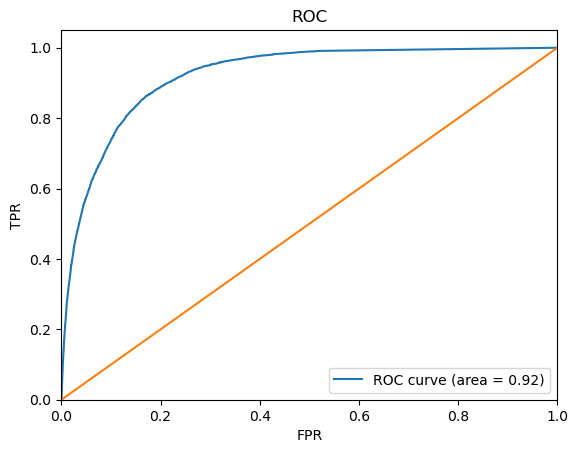

In [52]:
df['Income_class'] = df['Income'].apply(income_class2)
X = df.drop(columns=['Income',"Income_class"])
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_evaluation(X_test, y_test, rf_2) #Models:logistic2, logistic4, dt, rf_2, rf_4, bs_rf, pca_rf